In [1]:
%matplotlib inline
%matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *

set_global_seed(1884)

# Import Data

In [2]:
print(RAW_2019_HUMAN_DATA)
print(RAW_2020_HUMAN_DATA)


/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/raw/2019_hh_trials.csv
/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/raw/2020_hh_trials.csv


In [3]:
old_trials = pd.read_csv(RAW_2019_HUMAN_DATA, header=0)
new_trials = pd.read_csv(RAW_2020_HUMAN_DATA, header=0)

# Process New Trials

In [5]:
new_trials.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human'],
      dtype='object')

In [34]:
layouts_list = new_trials['layout_name'].unique()

In [8]:
num_trials = len(new_trials['trial_id'].unique())
print('num_trials', num_trials)


num_trials 294


In [37]:
# Compute num trials per environment
for layout_name in layouts_list:
    n_trials = len(new_trials[new_trials['layout_name']==layout_name]['trial_id'].unique())
    print(layout_name, n_trials)


marshmallow_experiment 37
you_shall_not_pass 38
cramped_corridor 38
marshmallow_experiment_coordination 37
asymmetric_advantages_tomato 36
soup_coordination 39
counter_circuit 34
inverse_marshmallow_experiment 35


In [10]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])


In [24]:
layout = eval(new_trials[new_trials['layout_name']=='counter_circuit']['layout'].to_numpy()[0])

[['X' 'X' 'X' 'P' 'D' 'P' 'X' 'X' 'X']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X']
 ['X' ' ' 'X' 'X' 'X' 'X' 'X' ' ' 'X']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'X']
 ['X' 'X' 'X' 'O' 'S' 'T' 'X' 'X' 'X']]


<IPython.core.display.Javascript object>


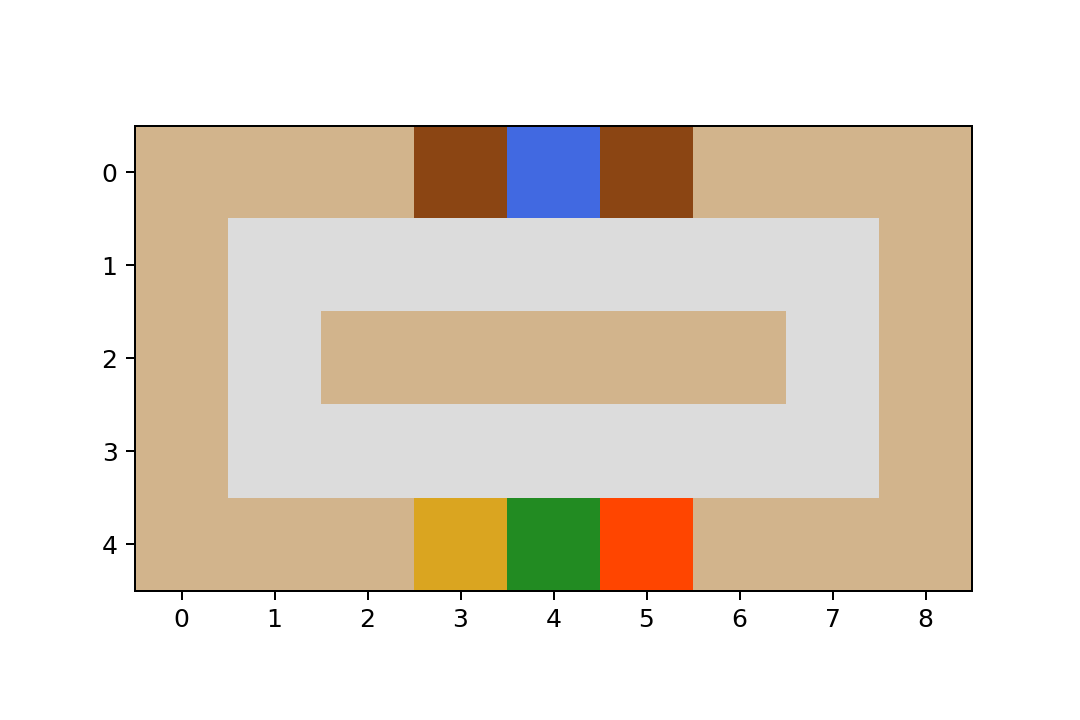

In [33]:
layout = np.array(layout)
print(layout)

def display_layout(layout):
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [210,180,140]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]
                
    plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)
    plt.show()
                
    
display_layout(layout)